In [ ]:
# Setting up a custom stylesheet in IJulia
file = open("style.css") # A .css file in the same folder as this notebook file
styl = read(file,String) # Read the file
HTML("$styl") # Output as HTML

<h1> More on SIR models </h1>

<h2>In this lecture</h2>

- [Outcome](#Outcome)
- [The threshold prediction of our SIR model](#The-threshold-prediction-of-our-SIR-model)
- [The duration of infectiousness implied by our model](#The-duration-of-infectiousness-implied-by-our-model)
- [A phase plane: plots of $I$ vs $S$](#A-phase-plane:-plots-of-$I$-vs-$S$)
- [Putting it all together: estimates of $\gamma$ and $\lambda$](#Putting-it-all-together:-estimates-of-$\gamma$-and-$\lambda$)


[Back to the top](#In-this-lecture)

<h2>Outcome</h2>

After this lecture, you will be able to
- Explain the threshold phenomenon in SIR models
- Use three-week duration of infectiousness to estimate $\gamma$ in our EVD model
- Plot the course of an epidemic in the $SI$ phase plane
- Use country populations plus the threshold phenomenon to estimate $\lambda$ in our EVD model

[Back to the top](#In-this-lecture)

<h2>The threshold prediction of our SIR model</h2>

Recall the three equations of our SIR model:

1 ...     $ S(t_{i+1}) = S(t_i) - \lambda S(t_i)I(t_i)\,dt$

2 ...     $I(t_{i+1}) = I(t_i) + \lambda S(t_i)I(t_i)\,dt - \gamma I(t_i)\,dt$

3 ...     $R(t_{i+1}) = R(t_i) + \gamma I(t_i)\,dt$

And recall that $S(t)$ is a symbol for the size of the susceptible population (not yet infected) at time $t$, likewise $I(t)$ represents the infecteds, and $R(t)$ the removeds.

The parameter $\lambda$ models the likelihood that when an infected person meets a susceptible person, the susceptible person becomes infected.

The parameter $\gamma$ models the rate at which infected people become removed.

Our task in this lecture is to propose estimates for the parameter values. To do so, we will use the *threshold phenomenon* of our model: for given values of $\lambda$ and $\gamma$, there is no epidemic unless $S(0)$ is big enough. 

The reasoning is simple: for an epidemic to happen, the infection must spread. But that means more people must be getting infected than are recovering. That is, the gain minus the loss of infecteds must be positive. In symbols, we must have

$\lambda SI - \gamma I > 0$

This can only happen if $\lambda S - \gamma > 0$. In other words, the number of infecteds can increase only when $S > \gamma/\lambda$.

This implies that if the initial population is below the threshold, indicated by $S(0) < \gamma/\lambda$, then the number of infecteds, even if initially large, will decrease. That is, in a small enough population, any initial infection simply dies out. On the other hand, if $S(0)>\gamma/\lambda$, the number of infecteds will increase, at least for a while.

It is of course obvious that for our model to apply to the West African epidemic, our parameter values must be such that the susceptible population at the beginning of 2014 was larger than $\gamma/\lambda$. 



[Back to the top](#In-this-lecture)

<h2>The duration of infectiousness implied by our model</h2>

We note that the loss rate of infecteds is given by $\gamma I$. This means that every day, the fraction of infected people becoming removed is $\gamma$.

For example, consider $\gamma = 1/10$. Then every day a tenth of ill people recover. If we assume that every person is ill for 10 days, and as many people are getting ill as recovering, then a tenth of all ill people recover every day.

In other words, it makes sense to think of the duration of one person's illness as $1/\gamma$. Recall that the duration of EVD is approximately three weeks. This means we may estimate that $1/\gamma\approx 21$. We will therefore set $\gamma=0.05$ as a reasonable estimate.

It is crude to think that they are equally infectious every day of these three weeks, but that is what we are doing. Our assumption was that the only difference between people is whether they are susceptible, infected or removed.

Likewise, it is crude to think that all infected people are ill in the same way and for the same duration, but again this is what we do. In fact, without a lot more data (especially data on duration of illness) and a considerably more complicated model, this is all we can do. 

[Back to the top](#In-this-lecture)

<h2>A phase plane: plots of $I$ vs $S$</h2>

A good way to illustrate the threshold phenomenon is via plots of $I$ versus $S$. That is, we run the model as we did in the previous lecture, but now we plot the phase diagram. (Well, part of it---the full phase diagram gives all three dependent variables.)

We re-use the code from the previous lecture (just cut and paste):


In [1]:
function updateSIR(popnvector)       # exactly the same function as before
    susceptibles = popnvector[1];
    infecteds    = popnvector[2]; 
    removeds     = popnvector[3];
    newS = susceptibles - lambda*susceptibles*infecteds*dt
    newI = infecteds + lambda*susceptibles*infecteds*dt - gam*infecteds*dt  
    newR = removeds + gam*infecteds*dt
    return [newS newI newR] 
end

updateSIR (generic function with 1 method)

In [2]:
# likewise, a run of the model uses exactly the same code ... but we'll play a bit with the values that determine a run

gam = 1/20.         # recovery rate parameter  (ditto)
lambda = 0.0005     # infection rate parameter
dt = 0.5            # length of time step in days
tfinal = 610.;      # respecting community values: lowercase only in the names 
s0 = 2000.          # initial susceptibles, note that we use the  type Float64 from the start
i0 = 4.             # initial infecteds; set this to 1. to  mimic an epidemic with an index case
r0 = 0.             # not always the case, of course

# initialise 
nsteps = round(Int64, tfinal/dt)    # note the use of round() with type Int64 to ensure that nsteps is an integer
resultvals = Array{Float64}(undef, nsteps+1, 3)  #initialise array of type Float64 to hold results
timevec = Array{Float64}(undef, nsteps+1)        # ... ditto for time values
resultvals[1,:] = [s0, i0, r0]  # ... and assign them to the first row
timevec[1] = 0.                 # also Float64, of course.

for step  = 1:nsteps
    resultvals[step+1, :] = updateSIR(resultvals[step, :])  # NB! pay careful attention to the rows being used
    timevec[step+1] = timevec[step] + dt
end

In [3]:
using Plots  # and of course we need to load Plots and choose to use the GR backend
gr()


Plots.GRBackend()

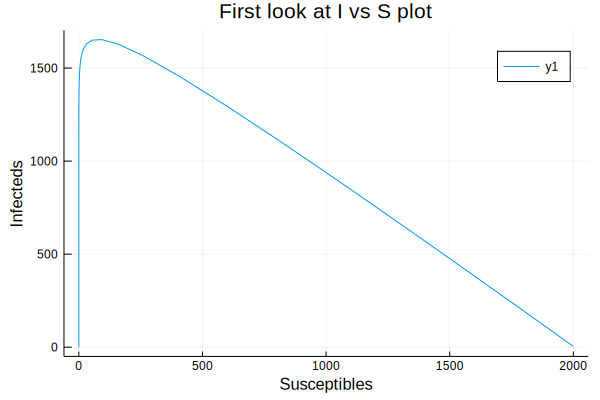

In [4]:
# now we can plot the outcome  

svals = resultvals[:,1];  # get the results
ivals = resultvals[:,2];

plot(svals, ivals, 
    title = "First look at I vs S plot",
    xlabel = "Susceptibles",
    ylabel = "Infecteds")        # and plot them

# we first vary S(0); the initial threshold is (0.1)/(1/20000) = 2000
# one can also vary gam and lambda and dt

[Back to the top](#In-this-lecture)

<h2>Putting it all together: estimates of $\gamma$ and $\lambda$</h2>

We already have the estimate $\gamma = 0.05$, based on a 20-day infectious period per patient.

We now need estimates of $\lambda$ and of $S(0)$ (we will discuss $I(0)$ and $R(0)$ later).

Since at the beginning of the epidemic, one could not safely say that any person in the three countries concerned would never be exposed to the Ebola virus, we should assume that the susceptible population was the sum of the populations of Guinea, Liberia and Sierra Leone. Using Wikipedia, this gives us $S(0)=22\times10^6$, because in total there are approximately 22 million people in these countries.

Now we use the threshold, which we write as $S^\ast = \gamma/\lambda$, so that $\lambda = \gamma/S^\ast$. Assuming that our $S(0)$ is far larger than $S^\ast$, because the epidemic was so severe, let us set $S^\ast = 0.1S(0)=2.2\times10^6$. This gives the estimate $\lambda = 0.05/2.2\times10^6 \approx 2.3\times10^{-8}$. 

Let's go back to our phase plot and put in these estimates.

[Back to the top](#In-this-lecture)